# Notebook Contents

- [Imports](#Imports)
- [Data](#Data)
- [Spray Chart](#Spray-Chart)
    - [PHI Home Field Spray Chart](#PHI-Spray-Chart)
- [Batted Ball Profiles](#Batted-Ball-Profiles)
    - [Batted Ball Profile - LA](#Batted-Ball-Profile---LA)
    - [Batted Ball Profile - EV](#Batted-Ball-Profile---EV)
    - [Quality Contact by LA & EV](#Quality-Contact-by-Launch-Angle-&-Exit-Velocity)
    - [ISO Value by LA & EV](#ISO-Value-by-Launch-Angle-&-Exit-Velocity)
    - [BABIP Value by LA & EV](#BABIP-Value-by-Launch-Angle-&-Exit-Velocity)
    - [wOBA Value by LA & EV](#[wOBA-Value-by-Launch-Angle-&-Exit-Velocity)
    - [xwOBA Value by LA & EV](#xwOBA-Value-by-Launch-Angle-&-Exit-Velocity)
    - [xBA by LA & EV](#xBA-by-Launch-Angle-&-Exit-Velocity)
    - [Home Runs by LA and EV](#Home-Runs-by-Launch-Angle-and-Exit-Velocity)
    - [xwOBA Against EV](#xwOBA-Against-EV)
    - [xwOBA Value of a Hit Against Its EV](#xwOBA-Value-of-a-Hit-Against-Its-Exit-Velocity)
- [Pitch Usage & Counts](#Pitch-Usage-&-Counts)
    - [Counts Breakdown](#Counts-Breakdown)
    - [Pitch Usage by Pitcher Handedness](#Pitch-Usage-by-Pitcher-Handedness)
    - [Pitch Type by Count](#Pitch-Type-by-Count)
- [Heatmaps](#Heatmaps)
    - [In-Zone Take Heatmaps - by Pitch Type vs. RHP](#In-Zone-Take-Heatmaps--by-Pitch-Type-vs.-RHP)
    - [In-Zone Take Heatmaps - by Pitch Type vs. LHP](#In-Zone-Take-Heatmaps--by-Pitch-Type-vs.-LHP)
    - [Out-of-Zone Chase Heatmaps - by Pitch Type vs. RHP](#Out-of-Zone-Chase-Heatmaps---by-Pitch-Type-vs.-RHP)
    - [Out-of-Zone Chase Heatmaps - by Pitch Type vs. LHP](#Out-of-Zone-Chase-Heatmaps---by-Pitch-Type-vs.-LHP)
    - [4-Seam Heatmaps](#4-Seam-Heatmaps)
    - [Slider Heatmaps](#Slider-Heatmaps)
    - [Changeup Heatmaps](#Changeup-Heatmaps)
    - [Sinker Heatmaps](#Sinker-Heatmaps)
    - [Curveball Heatmaps](#Curveball-Heatmaps)
    - [Cutter Heatmaps](#Cutter-Heatmaps)
    - [Split-Finger Heatmaps](#Split-Finger-Heatmaps)
    - [Knuckle Curve Heatmaps](#Knuckle-Curve-Heatmaps)
    - [Slow Curve Heatmaps](#Slow-Curve-Heatmaps)

# Imports

In [1]:
from pybaseball import spraychart
from pybaseball.plotting import plot_bb_profile
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
harper = pd.read_csv('../data/bryce-harper.csv')
harper.drop(columns = ['Unnamed: 0'], inplace = True)

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(harper.shape)
harper.head(2)

(2401, 93)


,pitch_type,game_date,player_name,launch_speed,launch_angle,hit_distance_sc,hc_x,hc_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,type,hit_location,bb_type,events,description,des,balls,strikes,pitch_count,zone,is_strike,swing_miss,first_pitch_take,first_pitch_swing,in_zone_take,out_of_zone_chase,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_-x,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,stand,p_throws,release_speed.1,release_spin_rate.1,spin_axis.1,pfx_x.1,pfx_-x.1,pfx_z.1,release_pos_x.1,release_pos_z.1,effective_speed.1,release_extension.1,release_pos_y.1,plate_-x.1,plate_x.1,plate_z.1,batter,pitcher,home_team,away_team,if_fielding_alignment,of_fielding_alignment,game_pk,at_bat_number,pitch_number,pitch_name,home_score,away_score,post_away_score,post_home_score,delta_home_win_exp,delta_run_exp,game_year
0,SL,2021-10-03,"Harper, Bryce",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,1.0,0.0,0.0,NaN,B,NaN,NaN,walk,ball,Bryce Harper walks.,3,2,3-2,13,0,0,0,0,0,0,84.5,2438.0,245.0,-0.56,6.72,3.72,3.50,5.43,84.9,6.4,54.10,1.04,-1.04,1.84,NaN,NaN,NaN,1,3,Top,663743,-9.466082,-122.817284,-2.673045,-4.020395,22.005665,-28.692107,3.01,1.68,L,L,84.5,2438.0,245.0,-0.56,6.72,3.72,3.50,5.43,84.9,6.4,54.10,1.04,-1.04,1.84,547180,595345,MIA,PHI,Infield shift,Strategic,632246,22,6,Slider,3,1,1,3,-0.028,0.214,2021
1,SL,2021-10-03,"Harper, Bryce",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,called_strike,Bryce Harper walks.,3,1,3-1,8,1,0,0,0,1,0,83.0,2412.0,252.0,-0.62,7.44,3.24,3.48,5.51,83.7,6.5,53.97,-0.10,0.10,1.72,NaN,NaN,NaN,1,3,Top,663743,-6.535792,-120.815188,-2.778350,-4.958802,21.662092,-29.168556,2.93,1.51,L,L,83.0,2412.0,252.0,-0.62,7.44,3.24,3.48,5.51,83.7,6.5,53.97,-0.10,0.10,1.72,547180,595345,MIA,PHI,Infield shift,Strategic,632246,22,5,Slider,3,1,1,3,0.000,-0.065,2021


In [3]:
harper.groupby(['pitch_type'], sort = False).mean()

,launch_speed,launch_angle,hit_distance_sc,hc_x,hc_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,hit_location,balls,strikes,zone,is_strike,swing_miss,first_pitch_take,first_pitch_swing,in_zone_take,out_of_zone_chase,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_-x,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,release_speed.1,release_spin_rate.1,spin_axis.1,pfx_x.1,pfx_-x.1,pfx_z.1,release_pos_x.1,release_pos_z.1,effective_speed.1,release_extension.1,release_pos_y.1,plate_-x.1,plate_x.1,plate_z.1,batter,pitcher,game_pk,at_bat_number,pitch_number,home_score,away_score,post_away_score,post_home_score,delta_home_win_exp,delta_run_exp,game_year
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SL,82.140000,14.816667,160.785124,141.917119,109.103220,0.438305,0.596034,0.416827,0.990385,0.182692,0.250000,3.864407,4.792683,1.018476,0.933025,9.993072,0.572748,0.159353,0.043880,0.087760,0.103926,0.092379,84.612702,2376.840647,189.764434,-0.024434,0.293210,1.205266,0.055173,5.970739,84.583834,6.241570,54.260231,0.265889,-0.265889,1.883695,549756.166667,551042.241935,555987.896552,1.023095,5.106236,581447.025404,-0.640136,-123.134333,-3.386771,-0.020330,24.277162,-30.652886,3.318730,1.597275,84.612702,2376.840647,189.764434,-0.024434,0.293210,1.205266,0.055173,5.970739,84.583834,6.241570,54.260231,0.265889,-0.265889,1.883695,547180.0,606340.157044,633387.928406,40.113164,3.071594,2.265589,2.242494,2.254042,2.290993,0.001016,0.023501,2021.0
CH,83.235238,11.038095,151.377358,135.975652,119.707826,0.342696,0.408087,0.461386,1.000000,0.237624,0.217822,3.391304,5.537500,1.094955,0.884273,10.272997,0.537092,0.148368,0.017804,0.065282,0.053412,0.071217,86.359941,1748.818991,221.157270,-0.879733,10.556795,5.589436,-1.612404,5.770979,86.390504,6.350445,54.149377,0.484006,-0.484006,1.774985,581087.724138,563579.040816,559504.479339,1.130564,4.356083,576205.394659,4.518539,-125.550370,-4.220702,-10.406425,25.424466,-26.597667,3.356231,1.604926,86.359941,1748.818991,221.157270,-0.879733,10.556795,5.589436,-1.612404,5.770979,86.390504,6.350445,54.149377,0.484006,-0.484006,1.774985,547180.0,611455.249258,633296.207715,33.747774,3.071217,1.694362,2.059347,2.083086,1.721068,-0.000362,0.041935,2021.0
FF,85.846269,27.645522,199.955720,118.122430,109.957850,0.436757,0.559832,0.490054,0.994624,0.215054,0.274194,3.794393,5.051471,1.009227,0.859285,8.031142,0.599769,0.110727,0.043829,0.087659,0.124567,0.024221,94.410265,2264.351788,191.611303,-0.204429,2.453149,15.980208,-0.705409,5.977982,94.386505,6.326182,54.172272,0.324591,-0.324591,2.723472,606084.500000,545606.567376,545438.384906,1.044983,4.595156,582551.655133,1.496388,-137.248389,-5.729266,-3.073262,30.435147,-14.255672,3.344660,1.605975,94.410265,2264.351788,191.611303,-0.204429,2.453149,15.980208,-0.705409,5.977982,94.386505,6.326182,54.172272,0.324591,-0.324591,2.723472,547180.0,597036.575548,633302.942330,35.516724,2.967705,1.790081,2.164937,2.181084,1.808535,0.000066,0.020662,2021.0
FC,86.032653,16.183673,173.612245,121.724000,112.863333,0.437500,0.550533,0.481250,0.975000,0.225000,0.425000,3.666667,5.117647,0.946565,0.809160,9.503817,0.664122,0.114504,0.053435,0.129771,0.114504,0.083969,88.548855,2343.938462,185.776923,0.013435,-0.161221,7.075420,-0.082214,5.807939,87.860305,6.188462,54.309313,0.068550,-0.068550,2.259313,587948.250000,536477.777778,560058.102564,1.267176,4.618321,570485.854962,0.120407,-128.817808,-3.846796,0.167424,25.353818,-24.916277,3.342443,1.604122,88.548855,2343.938462,185.776923,0.013435,-0.161221,7.075420,-0.082214,5.807939,87.860305,6.188462,54.309313,0.068550,-0.068550,2.259313,547180.0,553492.458015,633441.511450,35.702290,2.854962,1.595420,2.343511,2.374046,1.633588,0.001992,0.059847,2021.0
CU,80.205195,

In [4]:
counts = harper[['is_strike', 'in_zone_take', 'out_of_zone_chase', 'zone', 'launch_speed', 'launch_angle', 
                 'hit_distance_sc', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 
                 'pitch_count', 'woba_value', 'woba_denom', 'babip_value', 'iso_value', 'launch_speed_angle']]

In [5]:
r_harper = harper.loc[harper['p_throws'] == 'R']
l_harper = harper.loc[harper['p_throws'] == 'L']
# all pitches
ff = harper.loc[harper['pitch_type'] == 'FF']
sl = harper.loc[harper['pitch_type'] == 'SL']
ch = harper.loc[harper['pitch_type'] == 'CH']
si = harper.loc[harper['pitch_type'] == 'SI']
cu = harper.loc[harper['pitch_type'] == 'CU']
fc = harper.loc[harper['pitch_type'] == 'FC']
fs = harper.loc[harper['pitch_type'] == 'FS']
kc = harper.loc[harper['pitch_type'] == 'KC']
cs = harper.loc[harper['pitch_type'] == 'CS']
# vs RHP
r_ff = harper.loc[(harper['pitch_type'] == 'FF') & (harper['p_throws'] == 'R')]
r_sl = harper.loc[(harper['pitch_type'] == 'SL') & (harper['p_throws'] == 'R')]
r_ch = harper.loc[(harper['pitch_type'] == 'CH') & (harper['p_throws'] == 'R')]
r_si = harper.loc[(harper['pitch_type'] == 'SI') & (harper['p_throws'] == 'R')]
r_cu = harper.loc[(harper['pitch_type'] == 'CU') & (harper['p_throws'] == 'R')]
r_fc = harper.loc[(harper['pitch_type'] == 'FC') & (harper['p_throws'] == 'R')]
r_fs = harper.loc[(harper['pitch_type'] == 'FS') & (harper['p_throws'] == 'R')]
r_kc = harper.loc[(harper['pitch_type'] == 'KC') & (harper['p_throws'] == 'R')]
r_cs = harper.loc[(harper['pitch_type'] == 'CS') & (harper['p_throws'] == 'R')]
# vs LHP
l_ff = harper.loc[(harper['pitch_type'] == 'FF') & (harper['p_throws'] == 'L')]
l_sl = harper.loc[(harper['pitch_type'] == 'SL') & (harper['p_throws'] == 'L')]
l_ch = harper.loc[(harper['pitch_type'] == 'CH') & (harper['p_throws'] == 'L')]
l_si = harper.loc[(harper['pitch_type'] == 'SI') & (harper['p_throws'] == 'L')]
l_cu = harper.loc[(harper['pitch_type'] == 'CU') & (harper['p_throws'] == 'L')]
l_fc = harper.loc[(harper['pitch_type'] == 'FC') & (harper['p_throws'] == 'L')]
l_fs = harper.loc[(harper['pitch_type'] == 'FS') & (harper['p_throws'] == 'L')]
l_kc = harper.loc[(harper['pitch_type'] == 'KC') & (harper['p_throws'] == 'L')]
l_cs = harper.loc[(harper['pitch_type'] == 'CS') & (harper['p_throws'] == 'L')]

# Spray Chart

### PHI Spray Chart

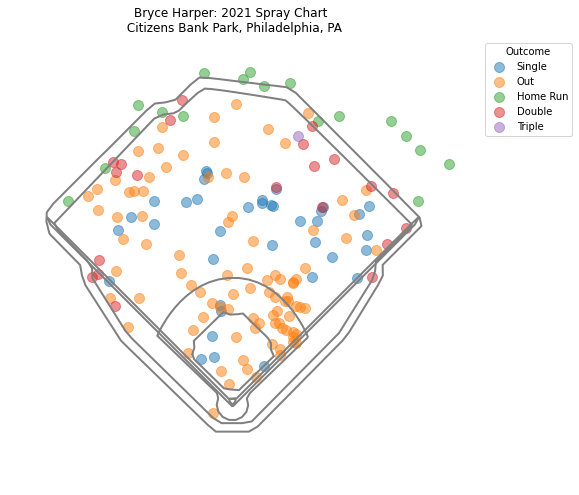

In [6]:
spray_phi = harper[harper['home_team'] == 'PHI']
spray_phi = spray_phi.loc[spray_phi['events'] != 'sac_bunt']
spraychart(spray_phi, 'phillies', 
           title = 'Bryce Harper: 2021 Spray Chart \n Citizens Bank Park, Philadelphia, PA');

# Batted Ball Profiles

### Batted Ball Profile - LA 

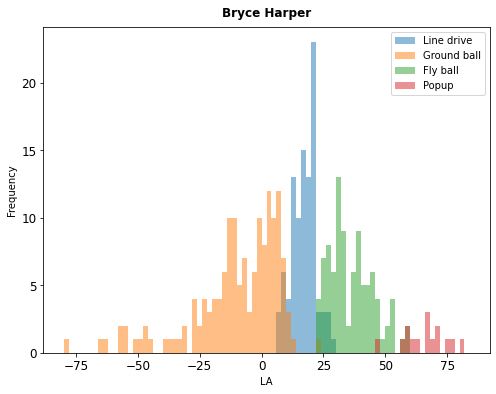

In [7]:
plt.figure(figsize = (8, 6))

plot_bb_profile(harper, parameter = 'launch_angle')
plt.xlabel('LA'), plt.ylabel('Frequency'), plt.legend()
plt.title('Bryce Harper', fontdict = font_title, pad = 15);

### Batted Ball Profile - EV

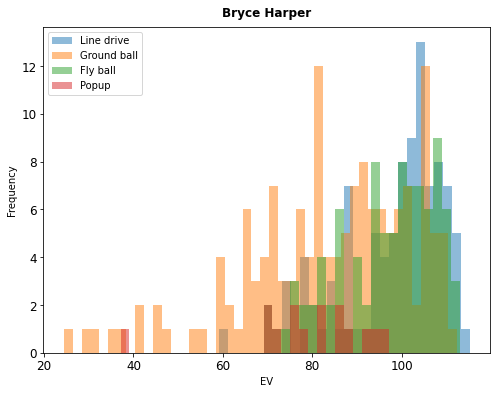

In [8]:
plt.figure(figsize = (8, 6))

plot_bb_profile(harper, parameter = 'launch_speed')
plt.xlabel('EV'), plt.ylabel('Frequency'), plt.legend()
plt.title('Bryce Harper', fontdict = font_title, pad = 15);

### Quality Contact by Launch Angle & Exit Velocity

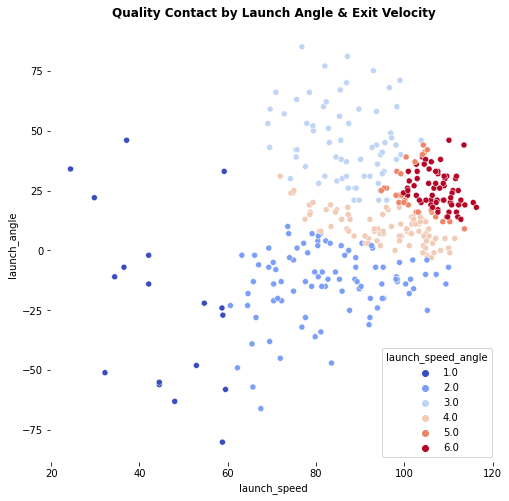

In [9]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'launch_speed_angle', 
                palette = 'coolwarm')
plt.title('Quality Contact by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### ISO Value by Launch Angle & Exit Velocity

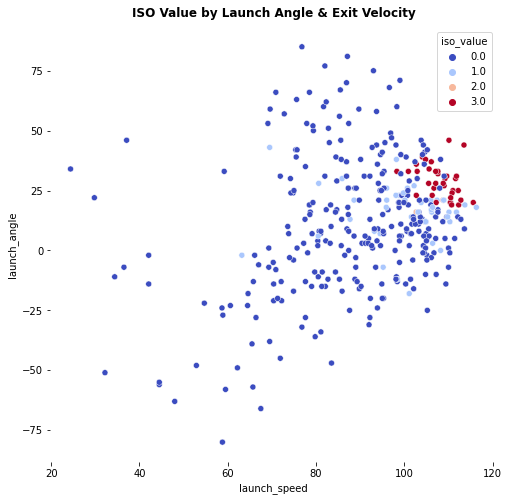

In [10]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'iso_value', 
                palette = 'coolwarm')
plt.title('ISO Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### BABIP Value by Launch Angle & Exit Velocity

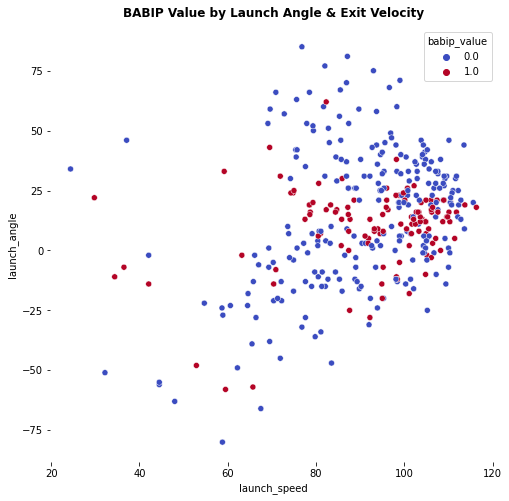

In [11]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'babip_value', 
                palette = 'coolwarm')
plt.title('BABIP Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### wOBA Value by Launch Angle & Exit Velocity

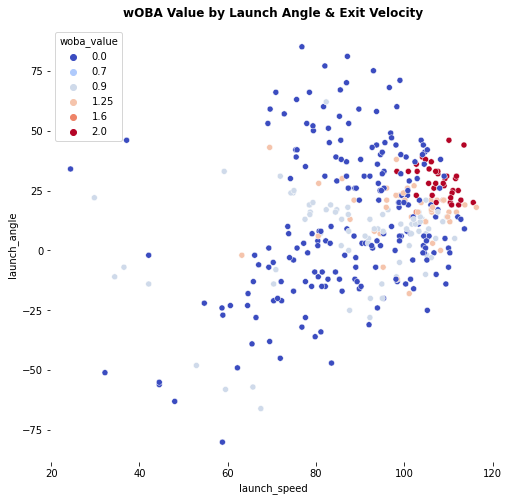

In [12]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'woba_value', 
                palette = 'coolwarm')
plt.title('wOBA Value by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### xwOBA Value by Launch Angle & Exit Velocity

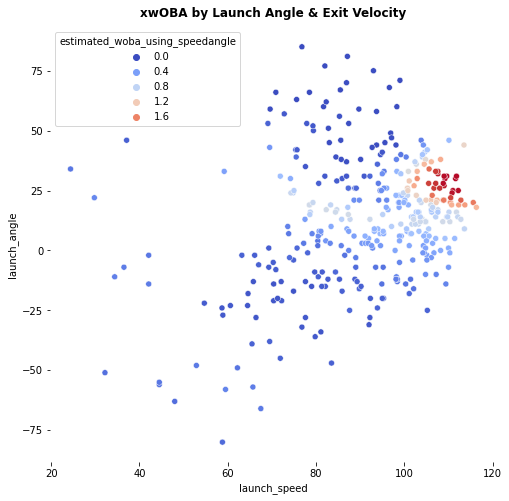

In [13]:
fig, ax = plt.subplots(figsize = (8, 8))
sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'estimated_woba_using_speedangle', 
                palette = 'coolwarm')
plt.title('xwOBA by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### xBA by Launch Angle & Exit Velocity

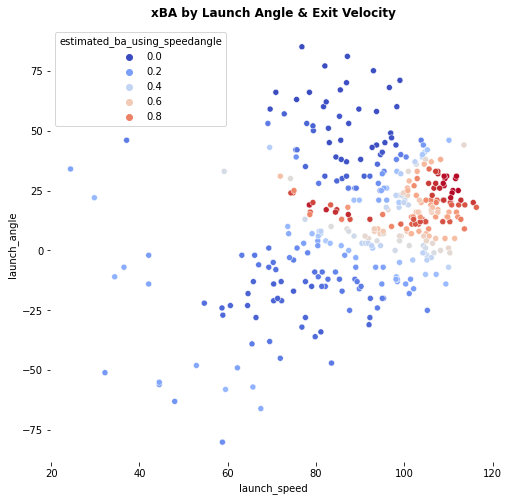

In [14]:
fig, ax = plt.subplots(figsize = (8, 8))

sns.despine(fig, left = True, bottom = True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'estimated_ba_using_speedangle', 
                palette = 'coolwarm')
plt.title('xBA by Launch Angle & Exit Velocity', fontdict = font_title, pad = 15);

### Home Runs by Launch Angle and Exit Velocity

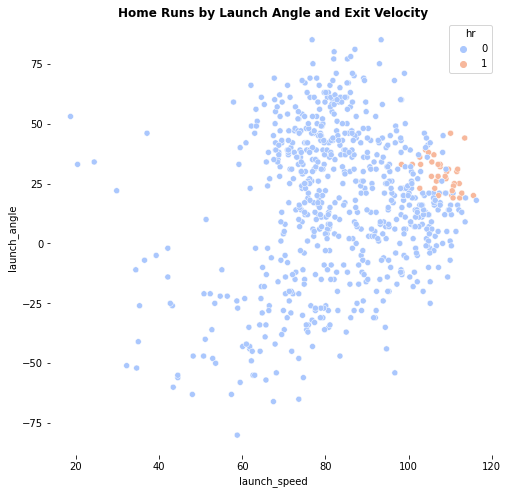

In [15]:
harper['hr'] = [1 if x == 'home_run' else 0 for x in harper['events']]
fig, ax = plt.subplots(figsize=(8, 8))

sns.despine(fig, left=True, bottom=True)
sns.scatterplot(data = harper, x = 'launch_speed', y = 'launch_angle', hue = 'hr', palette = 'coolwarm')
plt.title('Home Runs by Launch Angle and Exit Velocity', fontdict = font_title);

### xwOBA Against EV

In [16]:
harper.groupby(pd.cut(harper.launch_speed, 6)).mean()

,launch_speed,launch_angle,hit_distance_sc,hc_x,hc_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,hit_location,balls,strikes,zone,is_strike,swing_miss,first_pitch_take,first_pitch_swing,in_zone_take,out_of_zone_chase,release_speed,release_spin_rate,spin_axis,pfx_x,pfx_-x,pfx_z,release_pos_x,release_pos_z,effective_speed,release_extension,release_pos_y,plate_-x,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,release_speed.1,release_spin_rate.1,spin_axis.1,pfx_x.1,pfx_-x.1,pfx_z.1,release_pos_x.1,release_pos_z.1,effective_speed.1,release_extension.1,release_pos_y.1,plate_-x.1,plate_x.1,plate_z.1,batter,pitcher,game_pk,at_bat_number,pitch_number,home_score,away_score,post_away_score,post_home_score,delta_home_win_exp,delta_run_exp,game_year,hr
launch_speed,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(18.602, 34.967]",27.785714,4.000000,18.000000,130.135000,185.422500,0.235000,0.225750,0.450000,0.750000,0.500000,0.000000,1.000000,2.500000,0.857143,1.285714,10.285714,1.0,0.0,0.0,0.000000,0.0,0.0,85.257143,2207.571429,173.000000,0.138571,-1.662857,5.297143,-0.097143,5.918571,85.114286,6.157143,54.331429,-0.212857,0.212857,1.895714,NaN,612346.333333,592663.000000,0.857143,4.857143,580659.142857,0.483666,-123.999584,-4.095338,0.484985,24.356427,-26.587319,3.49,1.6,85.257143,2207.571429,173.000000,0.138571,-1.662857,5.297143,-0.097143,5.918571,85.114286,6.157143,54.331429,-0.212857,0.212857,1.895714,547180.0,576562.571429,633518.000000,42.000000,3.142857,3.285714,2.857143,2.857143,3.285714,-0.017000,-0.020429,2021.0,0.000000
"(34.967, 51.233]",43.205882,-28.764706,10.117647,122.308571,178.555714,0.195857,0.186714,0.257143,0.857143,0.285714,0.000000,1.000000,3.857143,0.470588,0.882353,6.411765,1.0,0.0,0.0,0.411765,0.0,0.0,85.435294,2292.000000,171.352941,0.114118,-1.369412,4.644706,0.290588,6.053529,85.170588,6.147059,54.360000,0.076471,-0.076471,2.145294,NaN,550874.000000,573096.333333,0.529412,4.941176,610994.823529,-1.135039,-124.285705,-3.689631,1.752931,25.291524,-27.099913,3.49,1.6,85.435294,2292.000000,171.352941,0.114118,-1.369412,4.644706,0.290588,6.053529,85.170588,6.147059,54.360000,0.076471,-0.076471,2.145294,547180.0,607968.764706,633205.235294,38.411765,2.647059,3.000000,2.117647,2.117647,3.000000,-0.004588,-0.041000,2021.0,0.000000
"(51.233, 67.5]",61.762712,-9.491525,55.677966,131.474737,169.006316,0.145842,0.134211,0.302632,1.000000,0.263158,0.052632,1.631579,4.052632,0.983051,1.067797,8.593220,1.0,0.0,0.0,0.186441,0.0,0.0,85.396610,2223.423729,195.813559,-0.230000,2.760000,2.849492,-0.584068,5.957288,85.391525,6.377966,54.124407,0.181695,-0.181695,2.341695,560759.500000,520152.166667,553428.125000,1.000000,4.542373,572379.779661,1.574058,-124.204393,-2.735384,-3.139765,25.637824,-28.110418,3.49,1.6,85.396610,2223.423729,195.813559,-0.230000,2.760000,2.849492,-0.584068,5.957288,85.391525,6.377966,54.124407,0.181695,-0.181695,2.341695,547180.0,600660.305085,633482.898305,35.220339,3.118644,2.067797,2.152542,2.152542,2.084746,0.004661,-0.038051,2021.0,0.000000
"(67.5, 83.767]",76.348136,23.115254,148.101695,124.526364,141.517922,0.239896,0.224766,0.235714,1.000000,0.246753,0.038961,2.688312,5.389610,1.142373,1.027119,6.576271,1.0,0.0,0.0,0.189831,0.0,0.0,89.807797,2196.792517,192.527211,-0.287153,3.445831,8.397559,-0.585356,5.912678,89.346780,6.241497,54.258136,0.115254,-0.115254,2.480678,601261.111111,537066.488372,543528.979798,1.013559,4.654237,580971.908475,1.889471,-130.614160,-4.000273,-3.910994,27.916001,-22.681736,3.49,1.6,89.807797,2196.792517,192.527211,-0.287153,3.445831,8.397559,-0.585356,5.912678,89.346780,6.241497,54.258136,0.115254,-0.115254,2.480678,547180.0,597404.664407,633268.535593,35.613559,3.291525,1.752542,2.054237,2.071186,1.762712,-0.001105,-0.045895,2021.0,0.000000
"(83.767, 100.033]",91.562019,21.817308,189.745192,121.009916,115.9073

### xwOBA Value of a Hit Against Its Exit Velocity

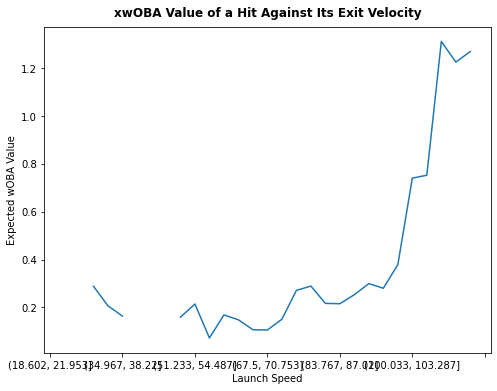

In [17]:
groups = harper.groupby(pd.cut(harper.launch_speed, 30))
plt.figure(figsize = (8, 6))
ax = groups['estimated_woba_using_speedangle'].mean().plot()
plt.xlabel('Launch Speed'), plt.ylabel('Expected wOBA Value')
plt.title('xwOBA Value of a Hit Against Its Exit Velocity', fontdict = font_title, pad = 15);

# Pitch Usage / Counts

### Counts Breakdown

In [18]:
counts.groupby(['pitch_count']).mean()

,is_strike,in_zone_take,out_of_zone_chase,zone,launch_speed,launch_angle,hit_distance_sc,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle
pitch_count,,,,,,,,,,,,,,
0-0,0.563884,0.124361,0.056218,9.165247,82.602941,15.786765,153.862319,0.353689,0.439770,0.439683,1.000000,0.285714,0.285714,3.508197
0-1,0.551852,0.044444,0.081481,9.474074,84.520000,16.670588,156.093023,0.332370,0.455674,0.343617,0.978723,0.212766,0.276596,3.304348
0-2,0.544776,0.007463,0.134328,10.432836,79.869048,15.595238,171.642857,0.313824,0.374353,0.220930,1.000000,0.139535,0.162791,3.411765
1-0,0.602362,0.185039,0.051181,8.996063,80.730189,20.377358,167.055556,0.443292,0.595583,0.572917,1.000000,0.250000,0.541667,3.458333
1-1,0.594378,0.088353,0.044177,9.032129,83.918391,18.563218,168.561798,0.501791,0.597930,0.633721,0.976744,0.418605,0.418605,3.627907
1-2,0.564356,0.019802,0.108911,10.049505,83.900000,11.089744,163.602564,0.411133,0.510822,0.298701,1.000000,0.194805,0.246753,3.333333
2-0,0.570000,0.190000,0.020000,9.060000,90.295238,14.428571,176.000000,0.421100,0.634900,0.595000,1.000000,0.400000,0.400000,4.400000
2-1,0.682432,0.094595,0.074324,8.898649,85.371186,24.576271,190.950000,0.499172,0.611517,0.661667,0.966667,0.366667,0.500000,3.689655
2-2,0.650485,0.019417,0.087379,9.121359,87.968182,18.034091,181.397727,0.394711,0.469978,0.264205,1.000000,0.170455,0.170455,3.844444


### Pitch Usage by Pitcher Handedness

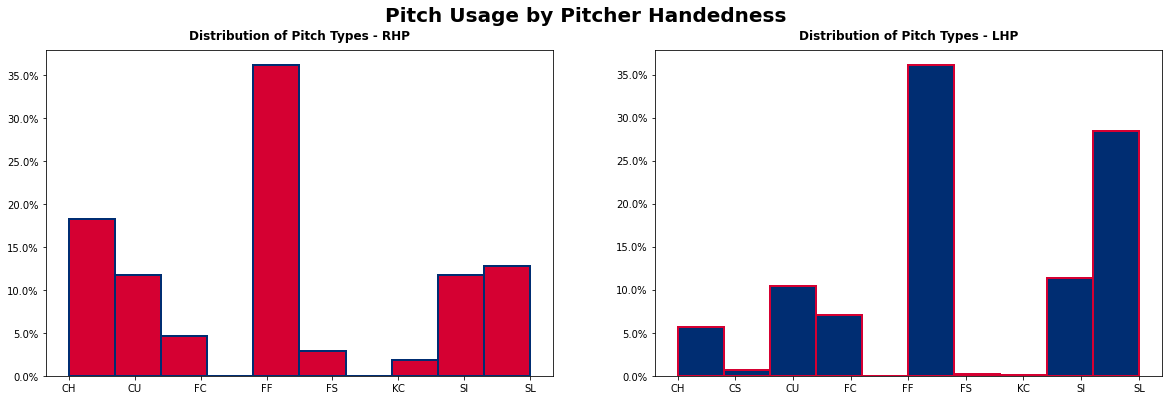

In [19]:
r_harper.dropna(subset=['pitch_type'], inplace = True)
l_harper.dropna(subset=['pitch_type'], inplace = True)
blue = '#002D72'
red = '#D50032'
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Pitch Usage by Pitcher Handedness', fontsize = 20, fontweight = 'bold')
dist_r = r_harper.pitch_type.sort_values()
axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = red, edgecolor = blue, linewidth = 2)
axs[0].yaxis.set_major_formatter(PercentFormatter(1))
axs[0].set_title('Distribution of Pitch Types - RHP', fontdict = font_title, pad = 15)
dist_l = l_harper.pitch_type.sort_values()
axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = blue, edgecolor = red, linewidth = 2)
axs[1].yaxis.set_major_formatter(PercentFormatter(1))
axs[1].set_title('Distribution of Pitch Types - LHP', fontdict = font_title, pad = 15);

### Pitch Type by Count

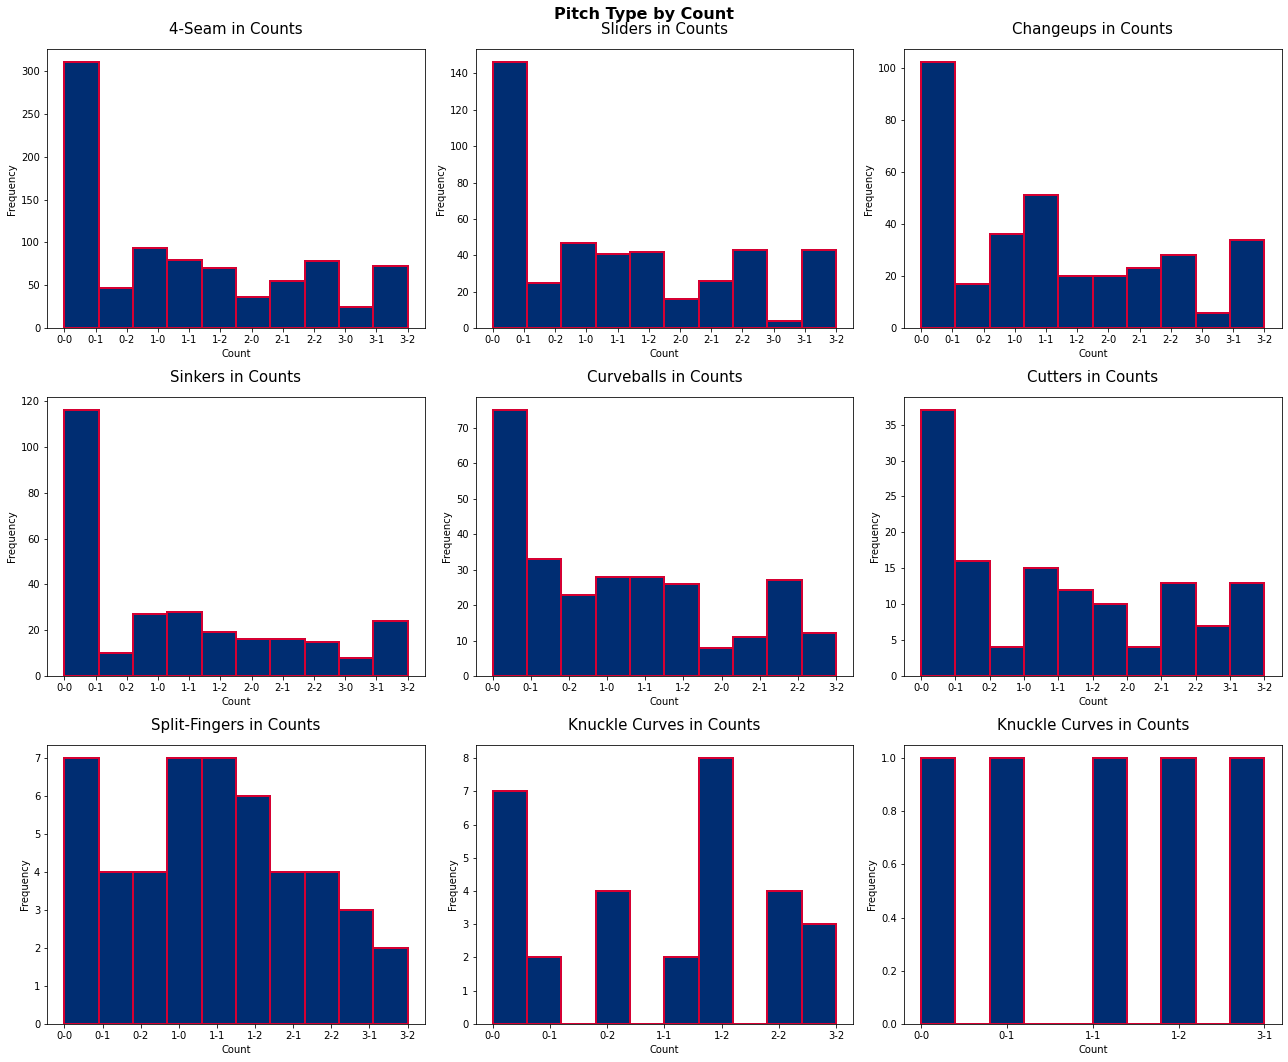

In [20]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15))
fig.suptitle('Pitch Type by Count', fontsize = 16, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count'), plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('4-Seam in Counts', fontsize = 15, pad = 15)
axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Sliders in Counts', fontsize = 15, pad = 15)
axs[0][2].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][2].set_title('Changeups in Counts', fontsize = 15, pad = 15)
axs[1][0].hist(si['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Sinkers in Counts', fontsize = 15, pad = 15)
axs[1][1].hist(cu['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Curveballs in Counts', fontsize = 15, pad = 15)
axs[1][2].hist(fc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][2].set_title('Cutters in Counts', fontsize = 15, pad = 15)
axs[2][0].hist(fs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][0].set_title('Split-Fingers in Counts', fontsize = 15, pad = 15)
axs[2][1].hist(kc['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][1].set_title('Knuckle Curves in Counts', fontsize = 15, pad = 15)
axs[2][2].hist(cs['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[2][2].set_title('Knuckle Curves in Counts', fontsize = 15, pad = 15)
plt.tight_layout();

# Heatmaps

### In-Zone Take Heatmaps - by Pitch Type vs. RHP

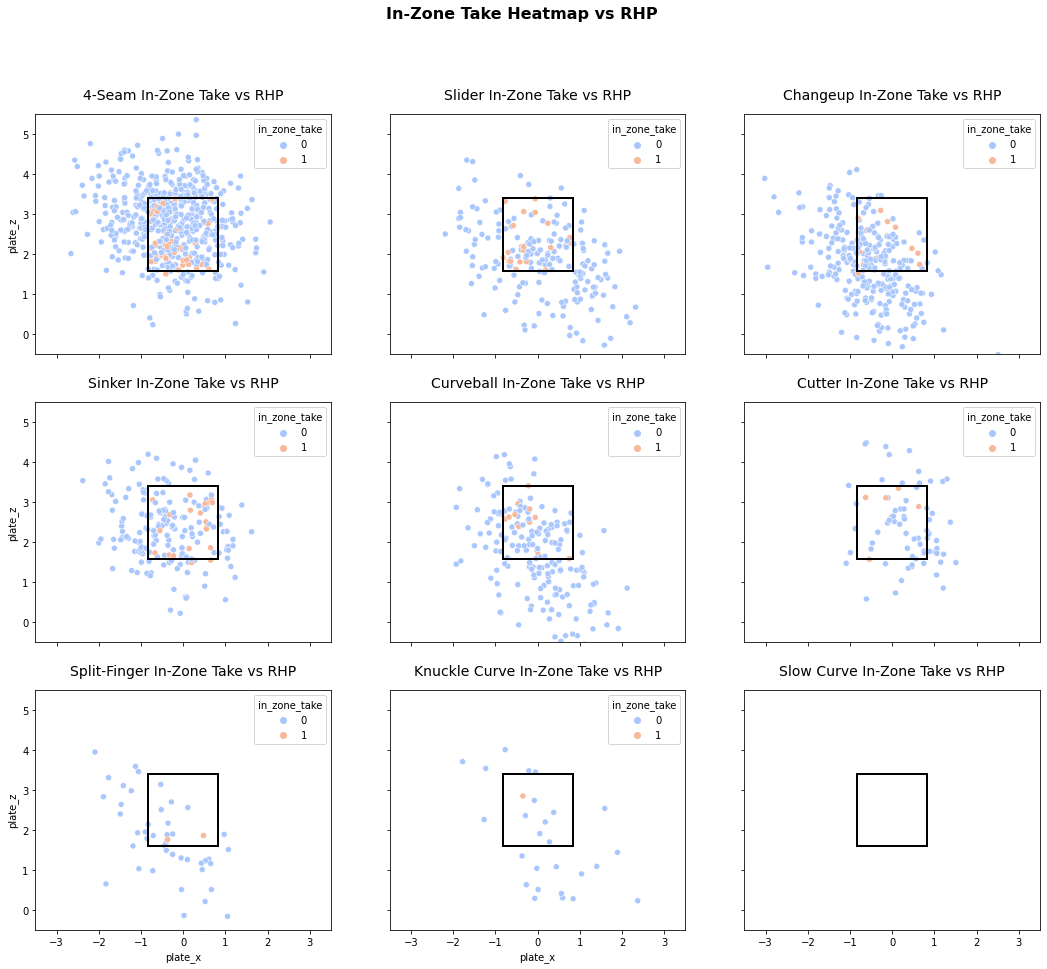

In [21]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('In-Zone Take Heatmap vs RHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=r_sl,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=r_ch,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=r_si,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Sinker In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=r_cu,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Curveball In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=r_fc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=r_fs,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Split-Finger In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=r_kc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Knuckle Curve In-Zone Take vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=r_cs,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Slow Curve In-Zone Take vs RHP', fontsize = 14, pad = 15);

### In-Zone Take Heatmaps - by Pitch Type vs. LHP

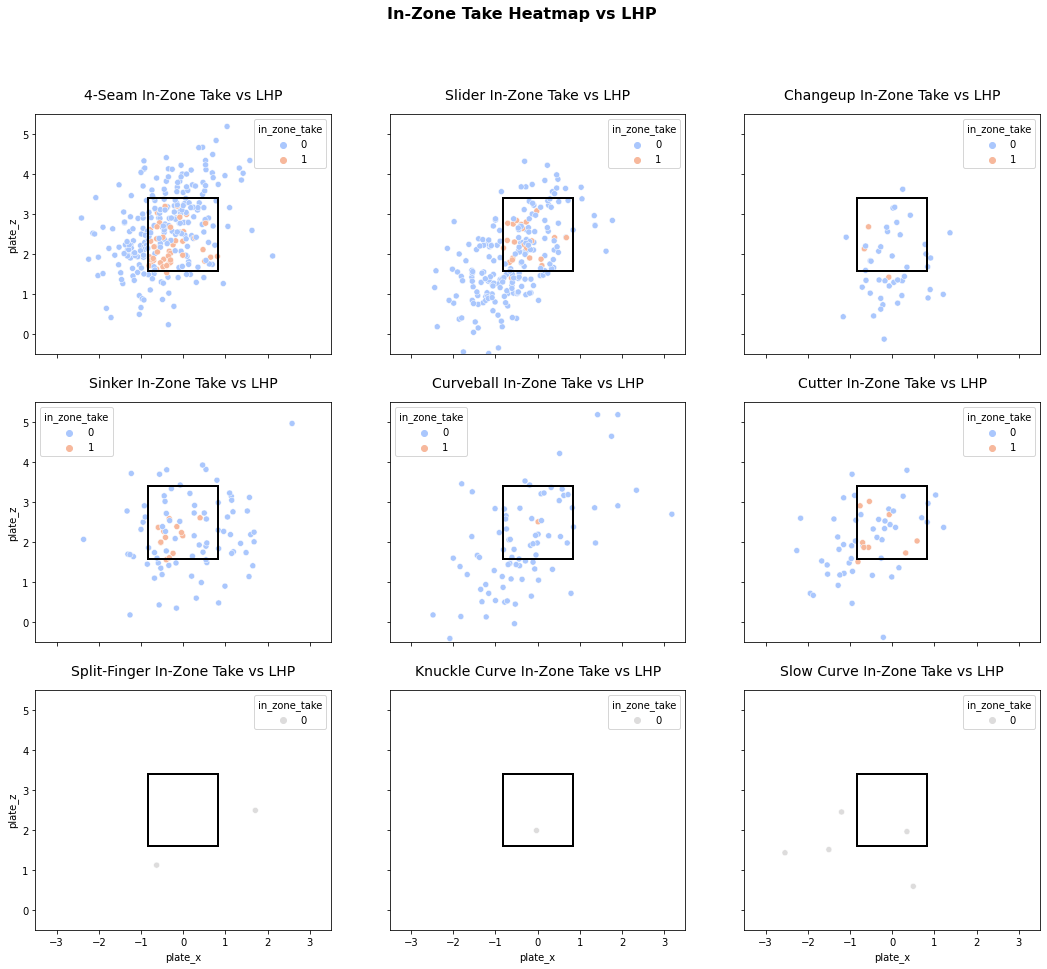

In [22]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('In-Zone Take Heatmap vs LHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=l_ff,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=l_sl,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=l_ch,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=l_si,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Sinker In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=l_cu,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Curveball In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=l_fc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=l_fs,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Split-Finger In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=l_kc,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Knuckle Curve In-Zone Take vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=l_cs,x='plate_x',y='plate_z',hue='in_zone_take',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Slow Curve In-Zone Take vs LHP', fontsize = 14, pad = 15);

### Out-of-Zone Chase Heatmaps - by Pitch Type vs. RHP

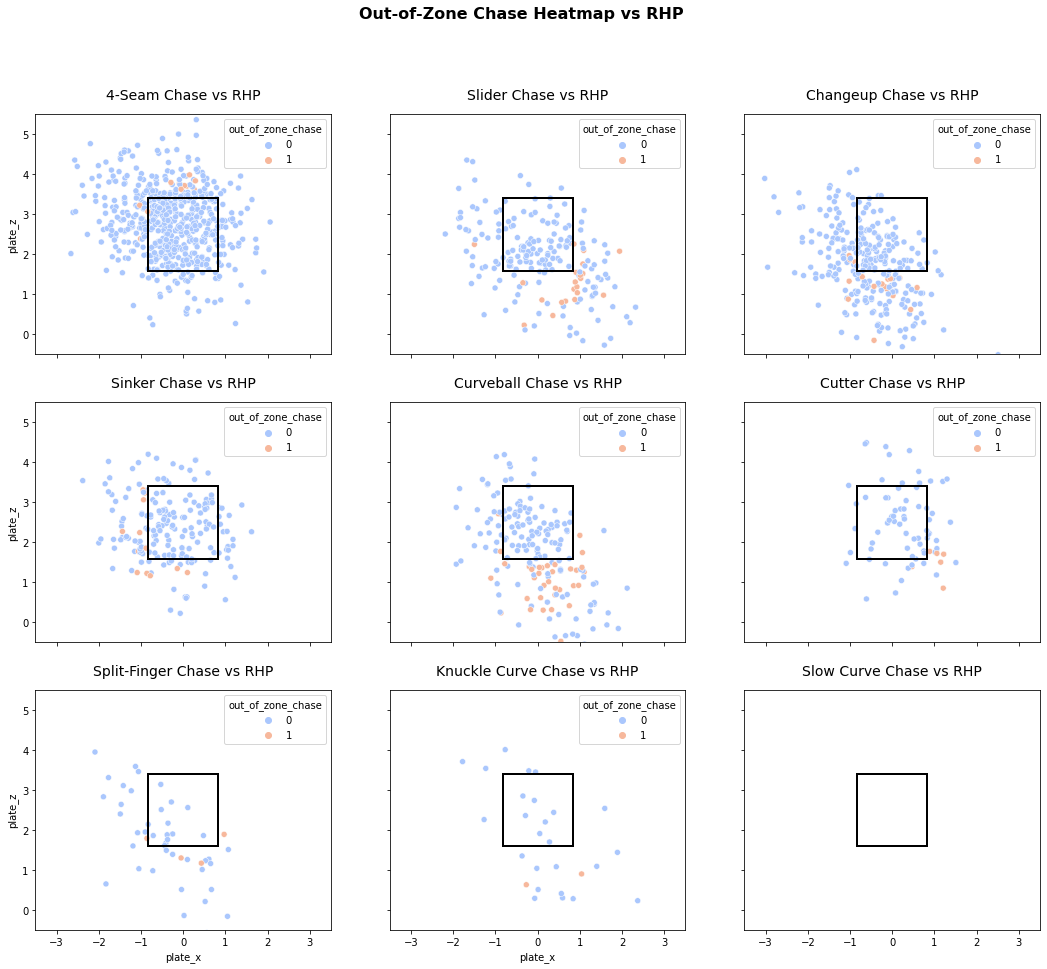

In [23]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('Out-of-Zone Chase Heatmap vs RHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=r_ff,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=r_sl,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=r_ch,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=r_si,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Sinker Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=r_cu,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Curveball Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=r_fc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=r_fs,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Split-Finger Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=r_kc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Knuckle Curve Chase vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=r_cs,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Slow Curve Chase vs RHP', fontsize = 14, pad = 15);

### Out-of-Zone Chase Heatmaps - by Pitch Type vs. LHP

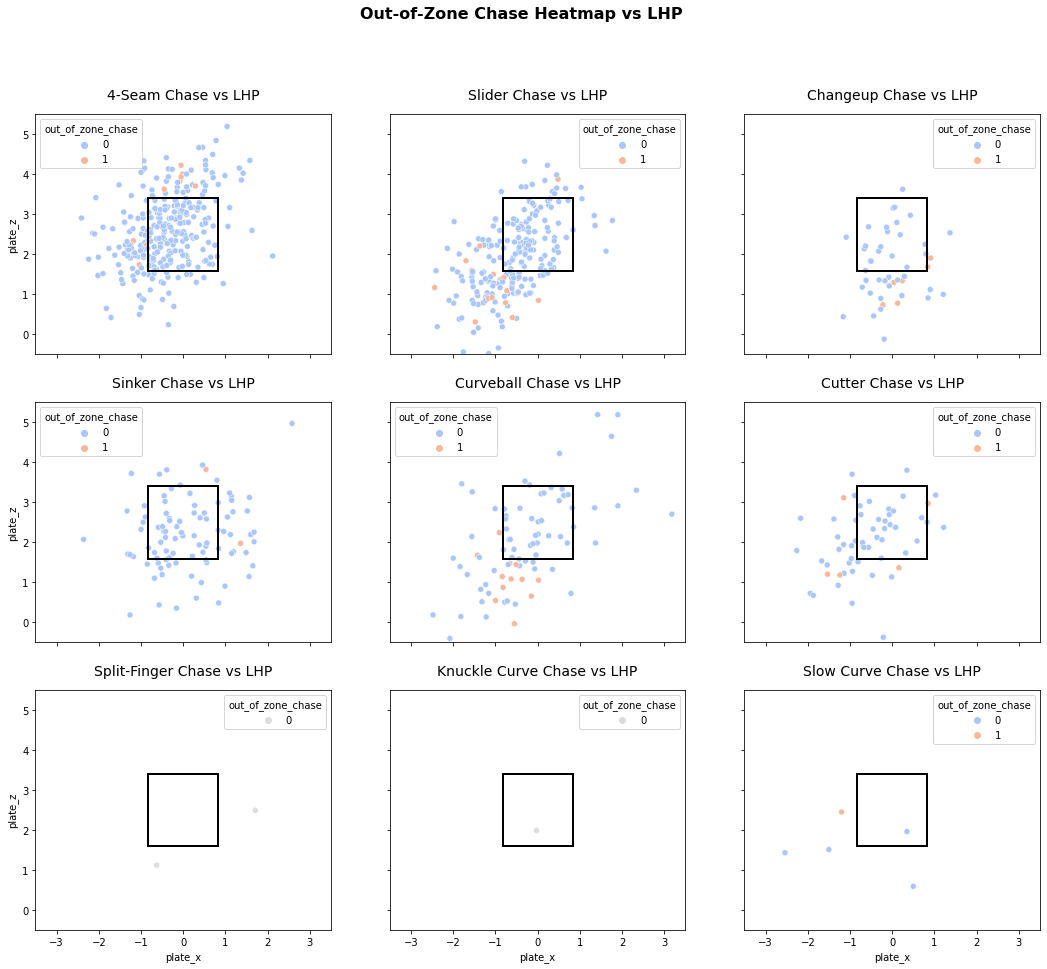

In [24]:
fig, axs = plt.subplots(3, 3, figsize = (18, 15), sharex = True, sharey = True)
fig.suptitle('Out-of-Zone Chase Heatmap vs LHP', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data=l_ff,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('4-Seam Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data=l_sl,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Slider Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data=l_ch,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('Changeup Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data=l_si,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Sinker Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data=l_cu,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Curveball Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data=l_fc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('Cutter Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][0],data=l_fs,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][0].set_title('Split-Finger Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][1],data=l_kc,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][1].set_title('Knuckle Curve Chase vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2][2],data=l_cs,x='plate_x',y='plate_z',hue='out_of_zone_chase',palette='coolwarm')
axs[2][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2][2].set_title('Slow Curve Chase vs LHP', fontsize = 14, pad = 15);

### 4-Seam Heatmaps

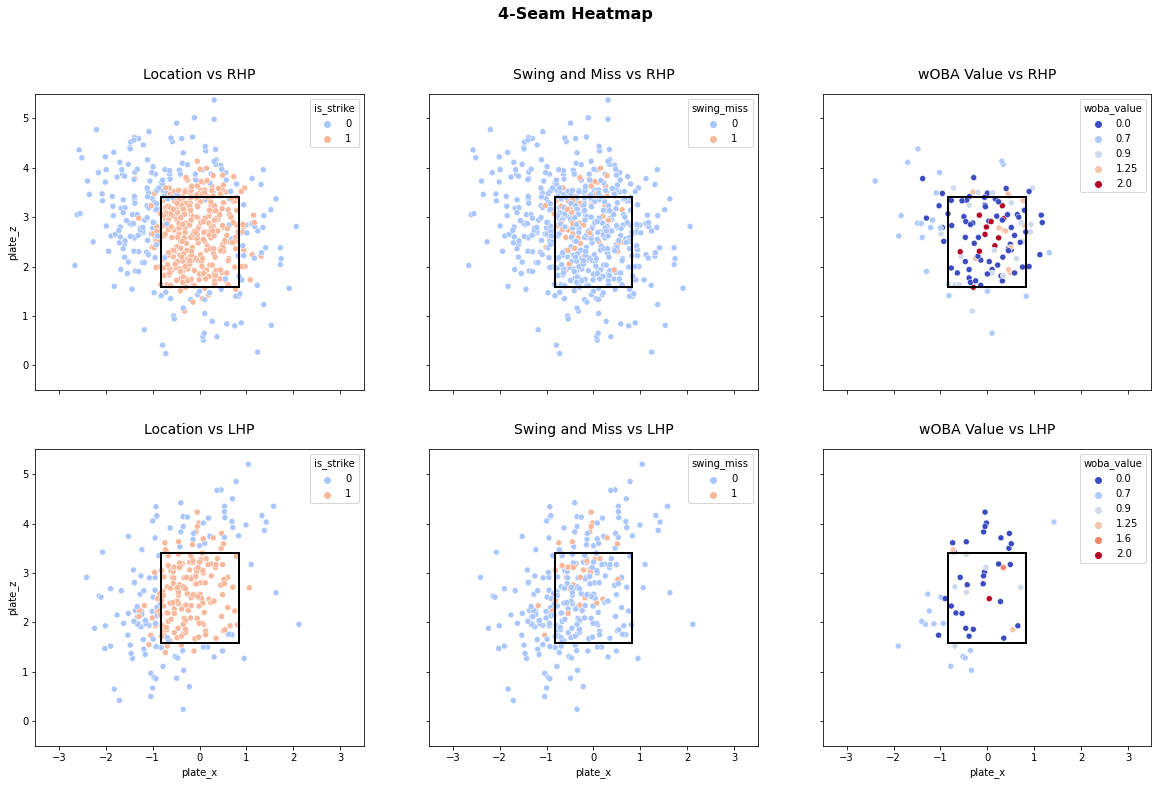

In [25]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('4-Seam Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ff,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Slider Heatmaps

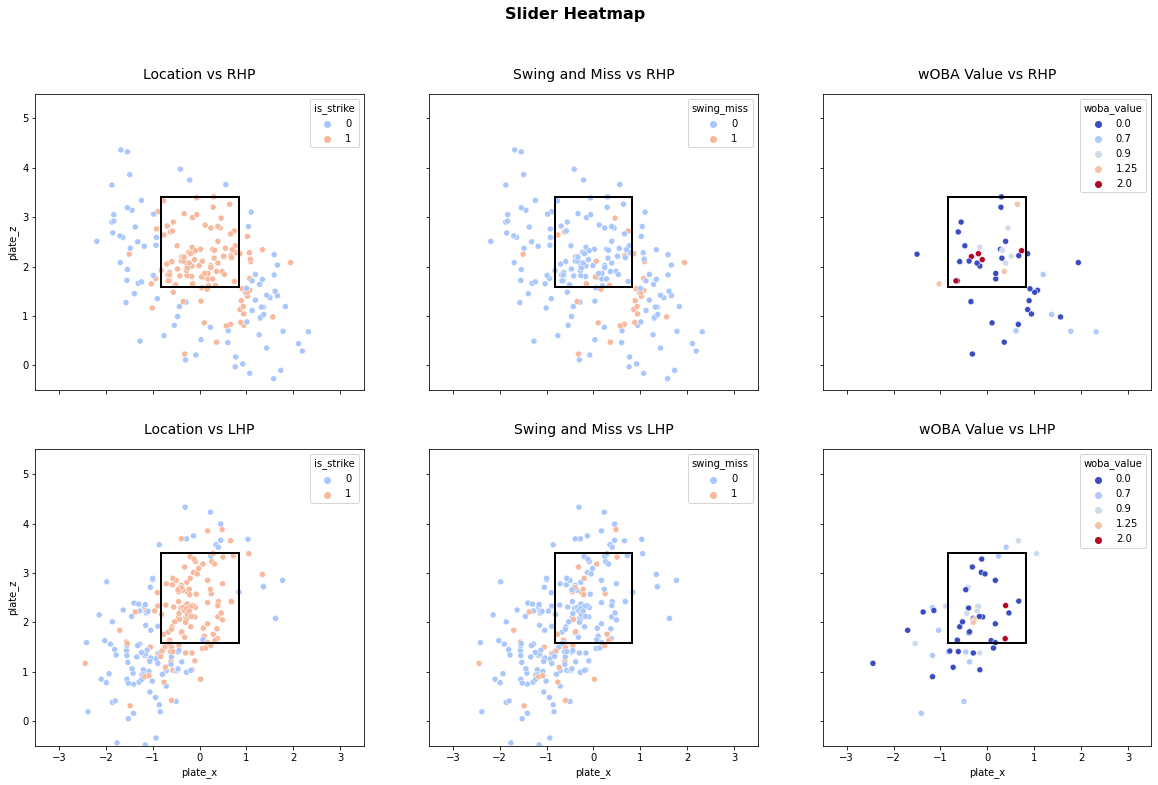

In [26]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Slider Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_sl,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Changeup Heatmaps

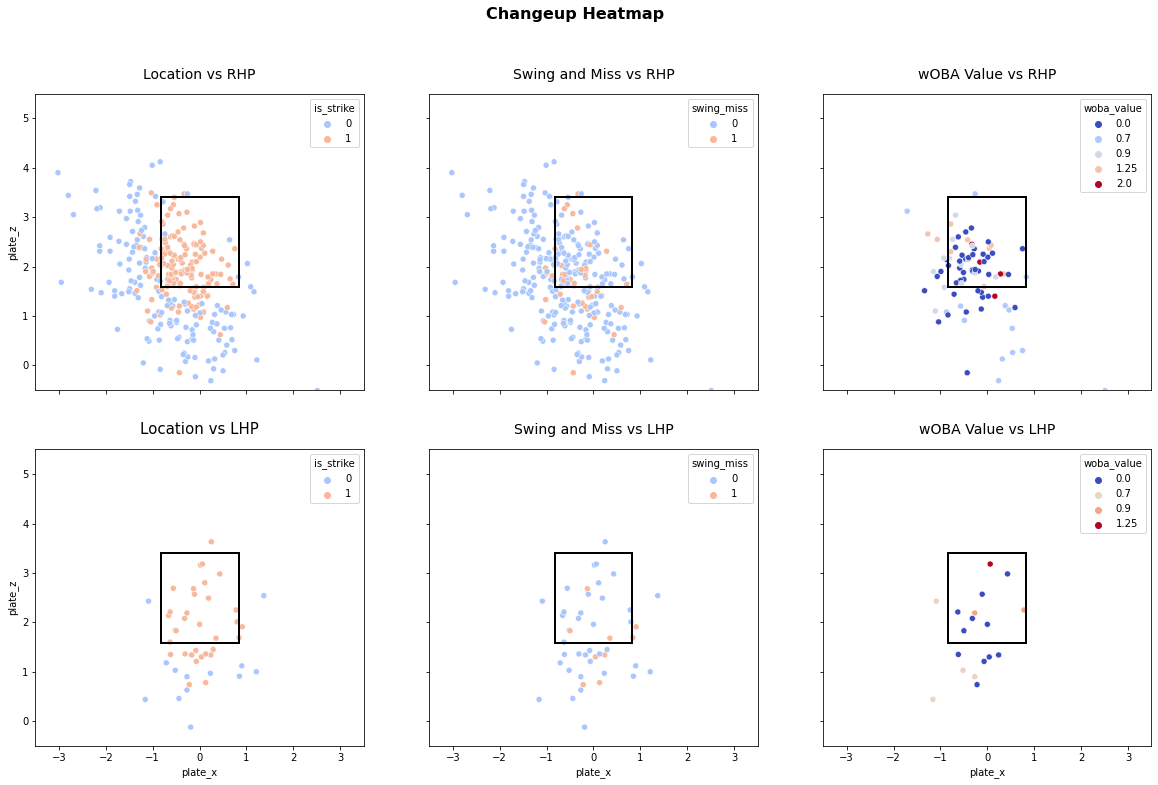

In [27]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Changeup Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 15, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_ch,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Sinker Heatmaps

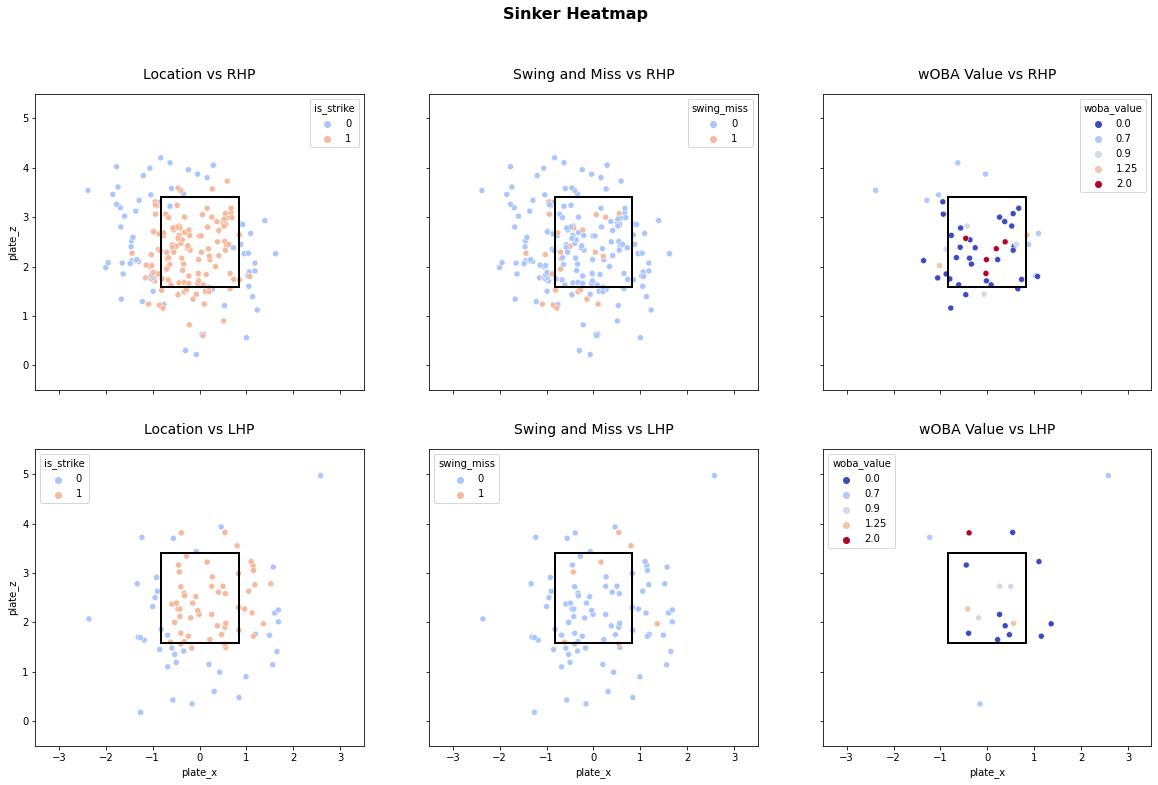

In [28]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Sinker Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_si,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Curveball Heatmaps

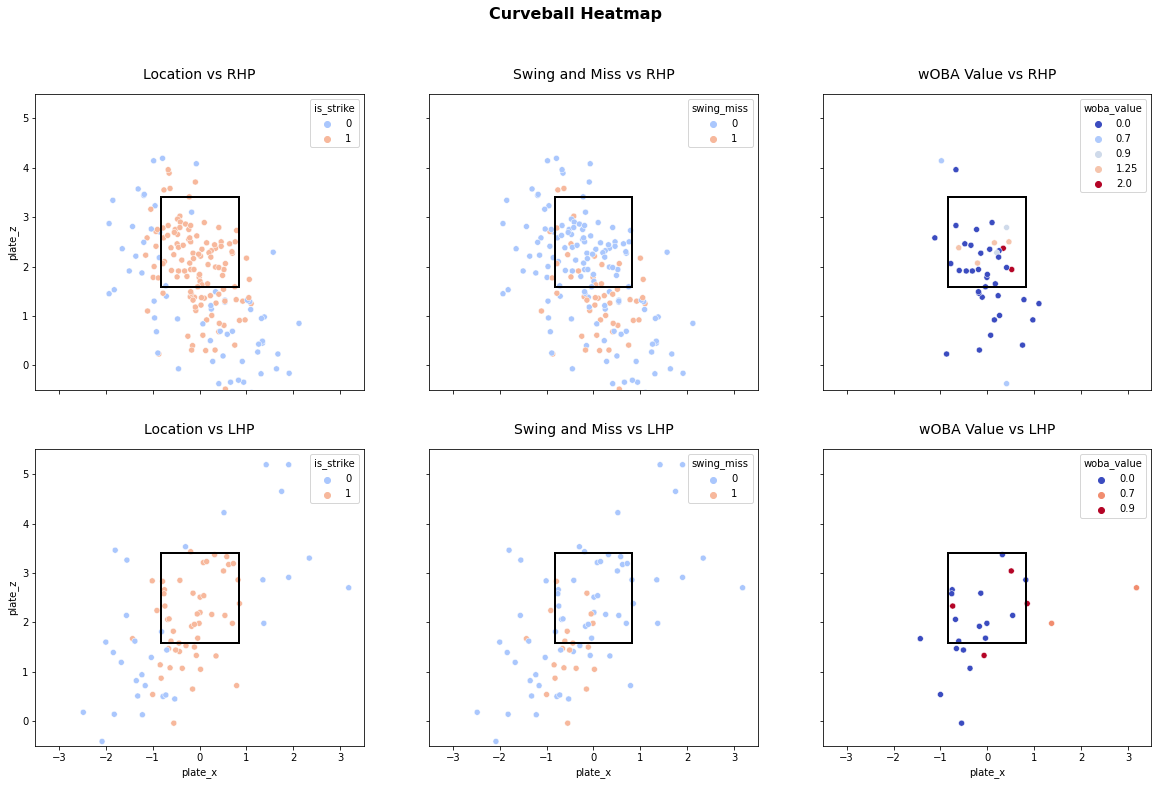

In [29]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Curveball Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_cu,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Cutter Heatmaps

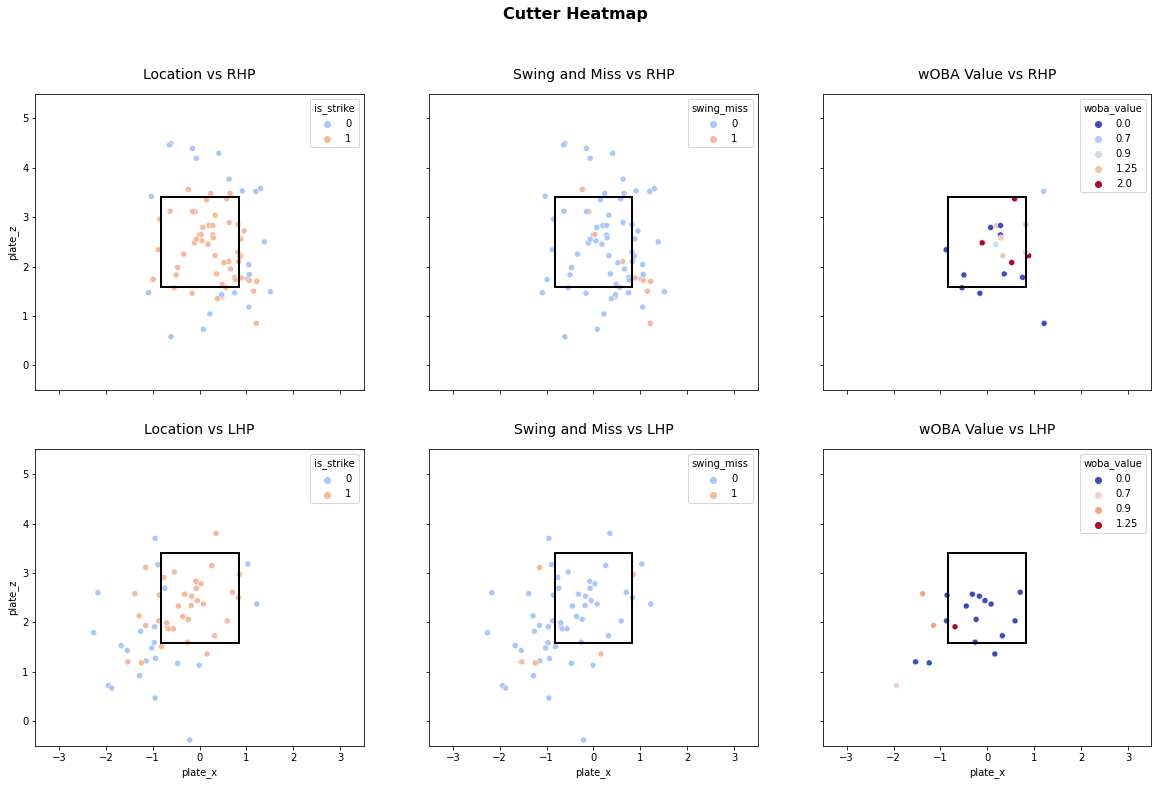

In [30]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Cutter Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Split-Finger Heatmaps

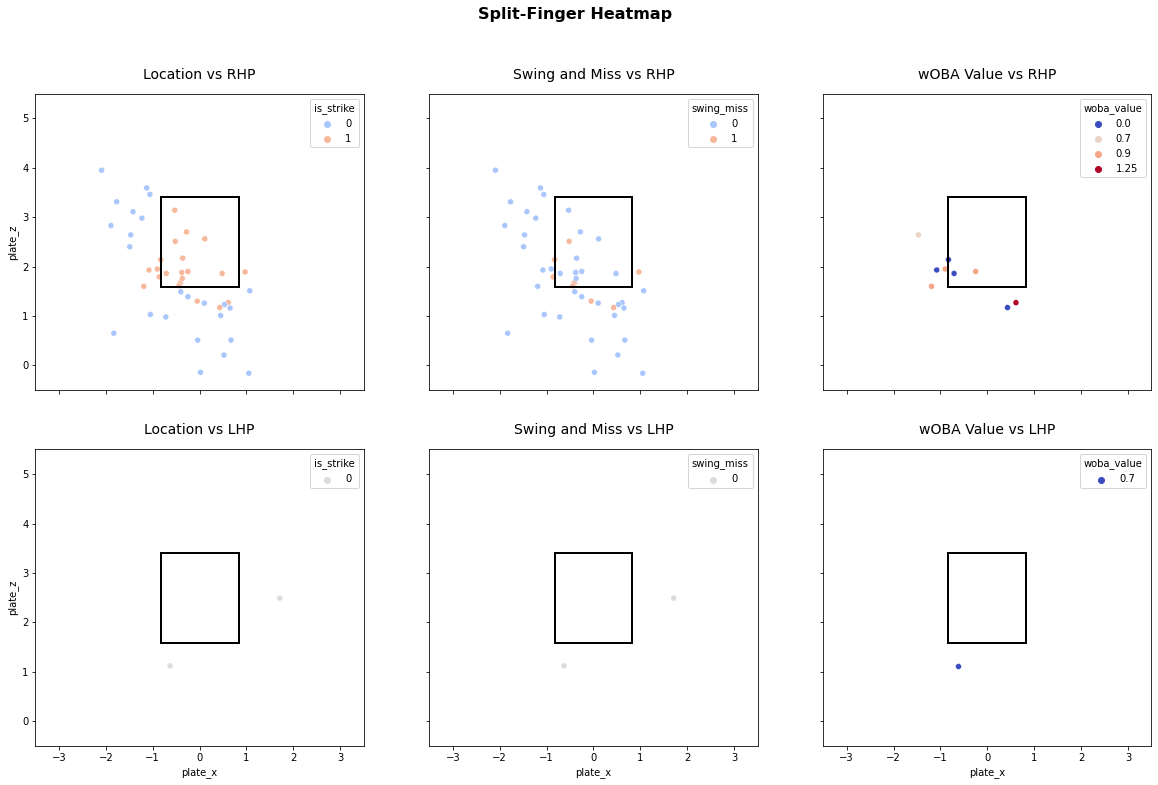

In [31]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Split-Finger Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_fs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Knuckle Curve Heatmaps

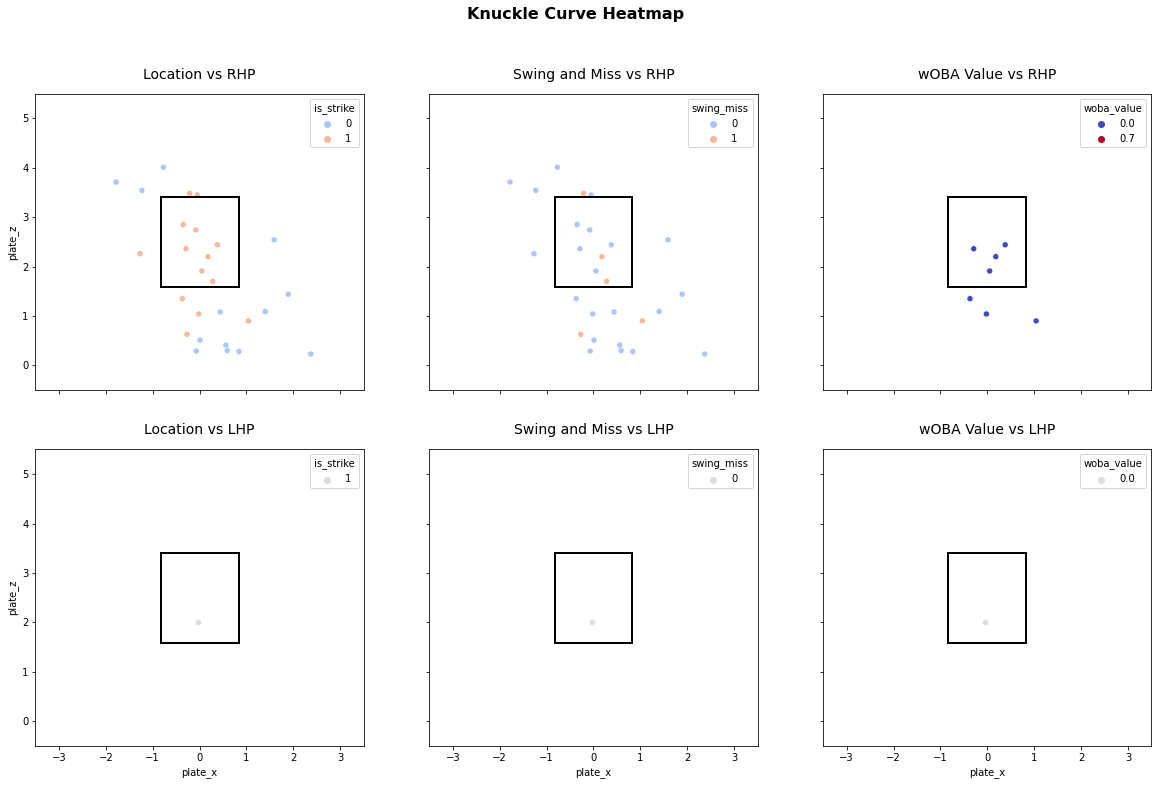

In [32]:
fig, axs = plt.subplots(2, 3, figsize = (20, 12), sharex = True, sharey = True)
fig.suptitle('Knuckle Curve Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0][0],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][0].set_title('Location vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][1],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[0][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][1].set_title('Swing and Miss vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[0][2],data = r_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[0][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0][2].set_title('wOBA Value vs RHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][0],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[1][0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][1],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1][1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1][2],data = l_kc,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[1][2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1][2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);

### Slow Curve Heatmaps

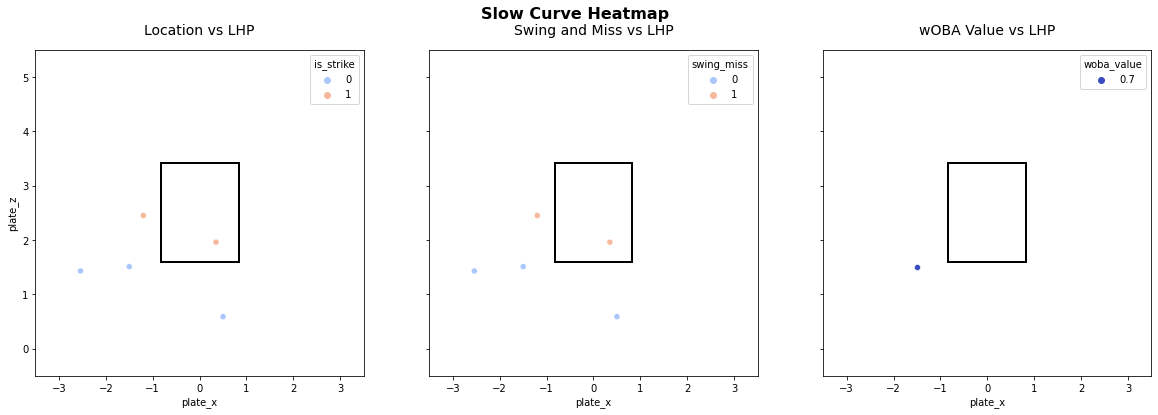

In [33]:
fig, axs = plt.subplots(1, 3, figsize = (20, 6), sharex = True, sharey = True)
fig.suptitle('Slow Curve Heatmap', fontsize = 16, fontweight = 'bold')
plt.axis(xmin = -3.5, xmax = 3.5), plt.axis(ymin = -0.5, ymax = 5.5)
sns.scatterplot(ax = axs[0],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'is_strike',palette = 'coolwarm')
axs[0].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[0].set_title('Location vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[1],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'swing_miss',palette = 'coolwarm')
axs[1].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[1].set_title('Swing and Miss vs LHP', fontsize = 14, pad = 15)
sns.scatterplot(ax = axs[2],data = l_cs,x = 'plate_x',y = 'plate_z',hue = 'woba_value',palette = 'coolwarm')
axs[2].add_patch(Rectangle((-.83, 1.59), 1.66, 1.82, fill = False, color = 'black', linewidth = 2))
axs[2].set_title('wOBA Value vs LHP', fontsize = 14, pad = 15);